# Data Scaling

In [1]:
import os
import datetime
import time
import pytz
import tensorflow as tf
from sklearn.datasets import make_regression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [5]:
def plot_result(result):
    # plot loss during training
    plt.title('Mean Squared Error')
    plt.plot(result.history['loss'], label='train')
    plt.plot(result.history['val_loss'], label='test')
    plt.legend()
    plt.show()

## Generate dataset

In [7]:
# generate regression dataset
# each input variable has a Gaussian distribution, as does the target variable. 
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

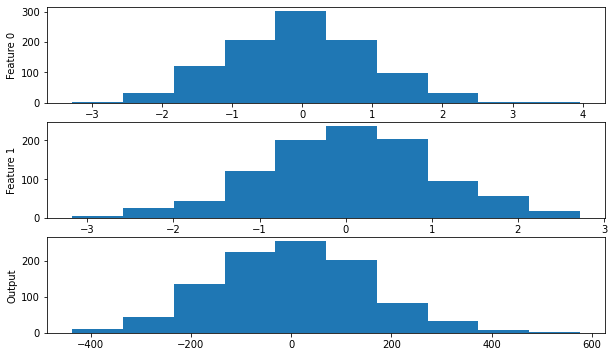

In [3]:
# regression predictive modeling problem
# generate regression dataset

fig, ax = plt.subplots(3,1,figsize=(10,6))
# histograms of input variables

ax[0].hist(x[:, 0])
ax[0].set_ylabel("Feature 0")
ax[1].hist(x[:, 1])
ax[1].set_ylabel("Feature 1")

# histogram of target variable
ax[2].hist(y)
ax[2].set_ylabel("Output")
plt.show()

## Model with unscaled data

Train: nan, Test: nan


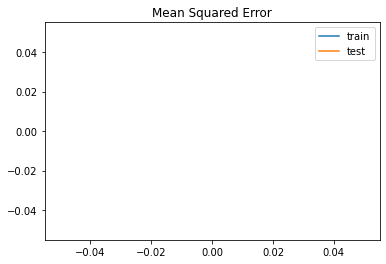

In [ ]:
# mlp with unscaled data for the regression problem

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', 
                kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', 
              optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_x, train_y, verbose=0)
test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

plot_result(history)

## Model with scaled data

Train: 0.002, Test: 0.006


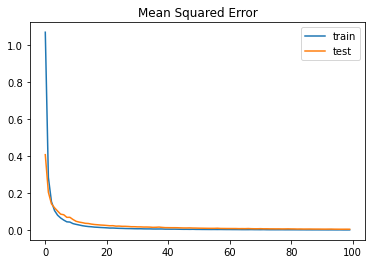

In [8]:
# mlp with scaled outputs on the regression problem
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# reshape 1d arrays to 2d arrays
train_y_2d = train_y.reshape(len(train_y), 1)
test_y_2d = test_y.reshape(len(train_y), 1)

# created scaler
scaler = StandardScaler()

# fit scaler on training dataset
scaler.fit(train_y_2d)

# transform training dataset
train_y_scaled = scaler.transform(train_y_2d)

# transform test dataset
test_y_scaled = scaler.transform(test_y_2d)

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, 
                activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', 
              optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit model
history = model.fit(train_x, train_y_scaled, 
                    validation_data=(test_x, test_y_scaled),
                    epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_x, train_y_scaled, verbose=0)
test_mse = model.evaluate(test_x, test_y_scaled, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

plot_result(history)

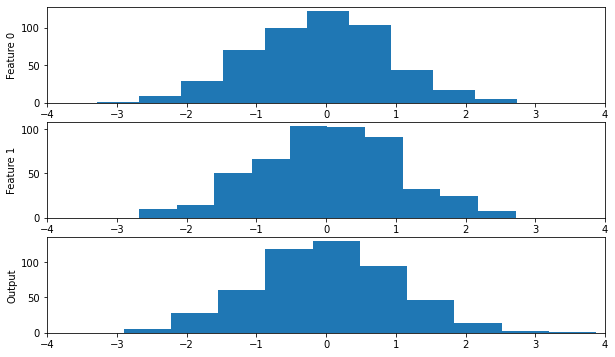

In [9]:
fig, ax = plt.subplots(3,1,figsize=(10,6))
# histograms of input variables

ax[0].hist(train_x[:, 0])
ax[0].set_ylabel("Feature 0")
ax[0].set_xlim(-4,4)
ax[1].hist(train_x[:, 1])
ax[1].set_ylabel("Feature 1")
ax[1].set_xlim(-4,4)

# histogram of target variable
ax[2].hist(train_y_scaled)
ax[2].set_ylabel("Output")
ax[2].set_xlim(-4,4)
plt.show()

##Model with Normalized data 

Train: 0.001, Test: 0.001


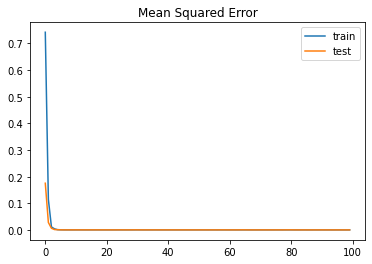

In [11]:
from sklearn.preprocessing import Normalizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

# fit scaler on training dataset

# fit training dataset
train_y_norm = Normalizer().fit_transform([train_y]).reshape(len(train_y), 1)

# fit test dataset
test_y_norm = Normalizer().fit_transform([test_y]).reshape(len(train_y), 1)

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, 
                activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', 
              optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit model
history = model.fit(train_x, train_y_norm, 
                    validation_data=(test_x, test_y_norm),
                    epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_x, train_y_norm, verbose=0)
test_mse = model.evaluate(test_x, test_y_norm, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

plot_result(history)

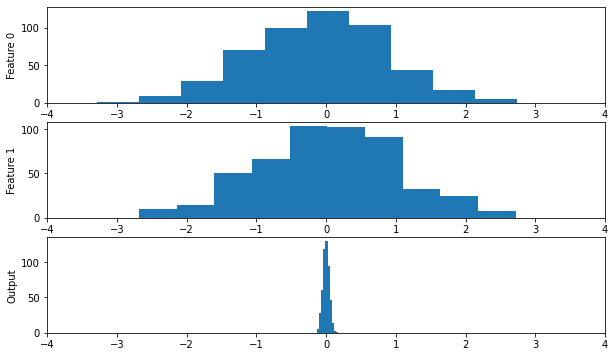

In [12]:
fig, ax = plt.subplots(3,1,figsize=(10,6))
# histograms of input variables

ax[0].hist(train_x[:, 0])
ax[0].set_ylabel("Feature 0")
ax[0].set_xlim(-4,4)
ax[1].hist(train_x[:, 1])
ax[1].set_ylabel("Feature 1")
ax[1].set_xlim(-4,4)

# histogram of target variable
ax[2].hist(train_y_norm)
ax[2].set_ylabel("Output")
ax[2].set_xlim(-4,4)
plt.show()